**📦 Install Required Python Packages**

In [8]:
!pip install -q flask pyngrok


In [9]:
!pip install -q flask flask-ngrok requests fpdf spacy transformers sentencepiece
!python -m spacy download en_core_web_sm


  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 39.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [10]:
%pip install streamlit whisper

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 1.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 47.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 45.0 MB/s eta 0:00:00
  Created wheel for whisper: filename=whisper-1.1.10-py3-none-any.whl size=41120 sha256=14511c65491836a54aeb97b33cfd107e70a0b538a7d22d954b5b76ed2e3a8dde
  Stored in directory: /root/.cache/pip/wheels/34/b8/4e/9c4c3351d670e06746a340fb4b7d854c76517eec225e5b32b1
Successfully built whisper


In [11]:
# 📦 Step 1: Install all required libraries
!pip install -q streamlit pyngrok requests fpdf scikit-learn spacy transformers sentencepiece markdownify
!python -m spacy download en_core_web_sm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 52.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [12]:
!pip install streamlit whisper ffmpeg-python


In [13]:
!streamlit run streamlit_app.py


Usage: streamlit run [OPTIONS] TARGET [ARGS]...
Try 'streamlit run --help' for help.

Error: Invalid value: File does not exist: streamlit_app.py


In [14]:
%pip install openai-whisper

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 803.2/803.2 kB 9.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for openai-whisper: filename=openai_whisper-20250625-py3-none-any.whl size=803979 sha256=dba31d7b1f5cd0be1bbe1f1ec2a88e8a97bc425154cd8d19fb5f2d3f1627818d
  Stored in directory: /root/.cache/pip/wheels/61/d2/20/09ec9bef734d126cba375b15898010b6cc28578d8afdde5869
Successfully built openai-whisper


In [29]:
%pip install pdfminer.six

ERROR:root:Unexpected exception finding object shape
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/google/colab/_debugpy_repr.py", line 54, in get_shape
    shape = getattr(obj, 'shape', None)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/werkzeug/local.py", line 318, in __get__
    obj = instance._get_current_object()
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/werkzeug/local.py", line 519, in _get_current_object
    raise RuntimeError(unbound_message) from None
RuntimeError: Working outside of request context.

This typically means that you attempted to use functionality that needed
an active HTTP request. Consult the documentation on testing for
information about how to avoid this problem.


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 30.8 MB/s eta 0:00:00


**🎤 Lecture Voice-to-Text Transcription using AssemblyAI**

In [16]:
import requests
import time
from IPython.display import Audio, display
from google.colab import files

API_KEY = "8eba2bb876e44b4c84e06632ca03e67f"
headers = {"authorization": API_KEY}

# Step 1: Upload audio file
upload_url = "https://api.assemblyai.com/v2/upload"

# Display an audio uploader
print("Please upload your audio file (.mp3 or .wav):")
uploaded = files.upload()

if uploaded:
    # Assuming a single file is uploaded
    filename = list(uploaded.keys())[0]
    audio_file_data = uploaded[filename]

    response = requests.post(upload_url, headers=headers, data=audio_file_data)
    audio_url = response.json()["upload_url"]

    # Step 2: Request transcription
    transcribe_url = "https://api.assemblyai.com/v2/transcript"
    json_data = {"audio_url": audio_url}
    response = requests.post(transcribe_url, json=json_data, headers=headers)
    transcript_id = response.json()["id"]

    # Step 3: Poll for result
    print("Transcribing... Please wait ⏳")
    while True:
        polling_response = requests.get(f"{transcribe_url}/{transcript_id}", headers=headers)
        status = polling_response.json()["status"]
        if status == "completed":
            print("Transcript:\n", polling_response.json()["text"])
            break
        elif status == "error":
            print("Error:", polling_response.json()["error"])
            break
        time.sleep(3)
else:
    print("No file uploaded.")

Please upload your audio file (.mp3 or .wav):


Saving 00 Introduction.mp3 to 00 Introduction.mp3
Transcribing... Please wait ⏳
Transcript:
 Think and Grow Rich by Napoleon Hill Author's Preface in every chapter of this book, mention has been made of the money making secret which has made fortunes for more than 500 exceedingly wealthy men whom I have carefully analyzed over a long period of years. The Secret was brought to my attention by Andrew Carnegie more than a quarter of a century ago. The canny, lovable old Scotsman carelessly tossed it into my mind when I was but a boy. Then he sat back in his chair with a merry twinkle in his eyes and watched carefully to see if I had brains enough to understand the full significance of what he had said to me. When he saw that I had grasped the idea, he asked if I would be willing to spend 20 years or more preparing myself to take it to the world to men and women who, without the secret, might go through life as failures. I said I would. And with Mr. Carnegie's cooperation, I've kept my pro

**🧩 Visualization of Word Frequency (Bar Chart of Key Terms)**

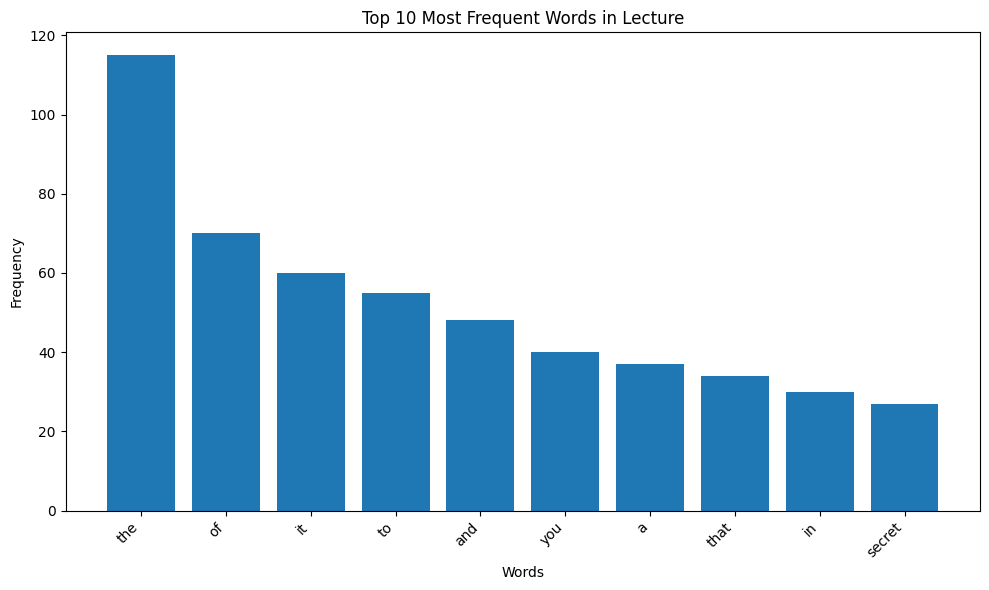

In [31]:
from collections import Counter
import matplotlib.pyplot as plt
import re

words = re.findall(r'\b\w+\b', extracted_text.lower())
common_words = Counter(words).most_common(10)

plt.figure(figsize=(10, 6))
plt.bar([w[0] for w in common_words], [w[1] for w in common_words])
plt.title("Top 10 Most Frequent Words in Lecture")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**📊 Word Cloud Visualization of Key Lecture Concepts**

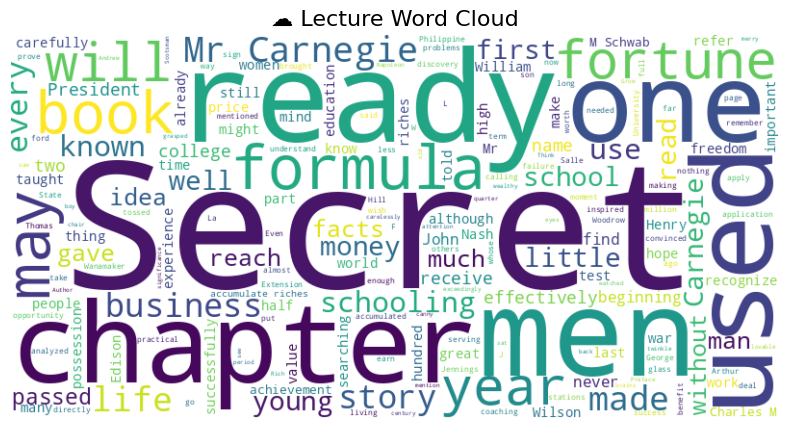

In [32]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(width=800, height=400, background_color='white').generate(extracted_text)
plt.figure(figsize=(10,5))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title("☁️ Lecture Word Cloud", fontsize=16)
plt.show()

**🔧 Create Flask App for the Backend**

In [26]:
from flask import Flask, request, jsonify
from pyngrok import ngrok
import threading

# ✅ Create Flask app
app = Flask(__name__)

# ✅ Homepage route
@app.route('/')
def home():
    return "✅ Flask backend for Lecture Voice-to-Notes Generator is running."

# ✅ Placeholder transcription endpoint
@app.route('/transcribe', methods=['POST'])
def transcribe():
    return jsonify({'message': 'Transcription endpoint is ready. Send audio data to process.'})

# ✅ Start Flask server on port 5002
def run_flask():
    app.run(port=5002)

threading.Thread(target=run_flask).start()

# ✅ Create ngrok tunnel
public_url = ngrok.connect(5002)
print("🔗 Public ngrok URL:", public_url)


 * Serving Flask app '__main__'
 * Debug mode: off


Address already in use
Port 5002 is in use by another program. Either identify and stop that program, or start the server with a different port.


🔗 Public ngrok URL: NgrokTunnel: "https://d8de86c3060e.ngrok-free.app" -> "http://localhost:5002"


**📺 Streamlit App Code**

In [27]:
with open("app.py", "w") as f:
    f.write('''
import streamlit as st
import requests
import time
import tempfile
import os
import spacy
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from transformers import pipeline
from fpdf import FPDF
from markdownify import markdownify as md

API_KEY = "8eba2bb876e44b4c84e06632ca03e67f"
headers = {"authorization": API_KEY}

# 🎨 Page config and custom CSS
st.set_page_config(page_title="Lecture Voice-to-Notes Generator", page_icon="🎙️", layout="wide")
st.markdown("""
    <style>
    .main {background-color: #f0f8ff;}
    h1, h2, h3 {color: #2c3e50;}
    .stButton>button, .stDownloadButton>button {
        background-color: #3498db;
        color: white;
        border-radius: 8px;
        padding: 0.5em 1em;
        font-weight: bold;
    }
    </style>
""", unsafe_allow_html=True)

# 📋 Sidebar
with st.sidebar:
    st.title("🧠 AI Features")
    st.markdown("- Summarization")
    st.markdown("- Keyword Extraction")
    st.markdown("- Topic Clustering")
    st.markdown("- Sentiment Analysis")
    st.markdown("- Multi-language Translation")
    st.markdown("- Speaker Diarization")
    st.markdown("- Export to PDF & Markdown")

# 🏷️ Title
st.title("🎙️ Lecture Voice-to-Notes Generator")
st.markdown("Upload your lecture audio and get clean, structured notes using AI.")

# 📤 Upload audio
audio_file = st.file_uploader("Upload your lecture audio (.mp3 or .wav)", type=["mp3", "wav"])

if audio_file:
    st.audio(audio_file, format="audio/mp3")
    st.info("Uploading and transcribing... Please wait ⏳")

    with tempfile.NamedTemporaryFile(delete=False, suffix=".mp3") as tmp:
        tmp.write(audio_file.read())
        tmp_path = tmp.name

    with open(tmp_path, "rb") as f:
        response = requests.post("https://api.assemblyai.com/v2/upload", headers=headers, data=f)
    audio_url = response.json()["upload_url"]

    transcribe_url = "https://api.assemblyai.com/v2/transcript"
    json_data = {
        "audio_url": audio_url,
        "speaker_labels": True,
        "auto_chapters": True
    }
    response = requests.post(transcribe_url, json=json_data, headers=headers)
    transcript_id = response.json()["id"]

    with st.spinner("Transcribing your lecture..."):
        status = "queued"
        progress = st.empty()
        while status not in ["completed", "error"]:
            polling_response = requests.get(f"{transcribe_url}/{transcript_id}", headers=headers)
            status = polling_response.json()["status"]
            progress.text(f"Status: {status}")
            time.sleep(3)

    if status == "completed":
        data = polling_response.json()
        transcript = data["text"]
        st.success("Transcription completed ✅")

        # 📊 Stats
        word_count = len(transcript.split())
        reading_time = round(word_count / 200, 2)
        st.markdown(f"**🧮 Word Count:** {word_count}")
        st.markdown(f"**⏱️ Estimated Reading Time:** {reading_time} minutes")

        # 📝 Raw Transcript
        st.subheader("📝 Raw Transcript")
        st.write(transcript)

        # 🗣️ Speaker Diarization
        st.subheader("🗣️ Speaker Diarization")
        utterances = data.get("utterances")
        if utterances and isinstance(utterances, list):
            for utterance in utterances:
                st.markdown(f"**Speaker {utterance['speaker']}** ({utterance['start']/1000:.2f}s): {utterance['text']}")
        else:
            st.warning("Speaker diarization not available or unsupported for this language.")

        # 📌 Structured Notes
        st.subheader("📌 Structured Notes")
        sentences = transcript.split(". ")
        for i, sentence in enumerate(sentences, 1):
            st.markdown(f"**{i}.** {sentence.strip()}")

        # ✂️ Summarization
        st.subheader("🧾 Summary")
        summarizer = pipeline("summarization", model="t5-small", tokenizer="t5-small")
        summary = summarizer(transcript[:1000], max_length=120, min_length=30, do_sample=False)[0]["summary_text"]
        st.success(summary)

        # 🔑 Keyword Extraction
        st.subheader("🔑 Keywords")
        nlp = spacy.load("en_core_web_sm")
        doc = nlp(transcript)
        keywords = list(set([token.text for token in doc if token.is_alpha and not token.is_stop]))
        st.write(", ".join(keywords[:20]))

        # 🧩 Topic Clustering
        st.subheader("🧩 Topic Clusters")
        clean_sentences = [s.strip() for s in sentences if len(s.strip().split()) > 2]
        if clean_sentences:
            vectorizer = TfidfVectorizer(stop_words="english")
            X = vectorizer.fit_transform(clean_sentences)
            kmeans = KMeans(n_clusters=3, random_state=42).fit(X)
            for i in range(3):
                st.markdown(f"**Cluster {i+1}:**")
                for j, label in enumerate(kmeans.labels_):
                    if label == i:
                        st.markdown(f"- {clean_sentences[j]}")
        else:
            st.warning("Not enough meaningful sentences for clustering.")

        # 📈 Sentiment Analysis
        st.subheader("📈 Sentiment Analysis")
        sentiment = pipeline("sentiment-analysis")
        sentiment_result = sentiment(transcript[:1000])[0]
        st.write(f"**Label:** {sentiment_result['label']} | **Confidence:** {round(sentiment_result['score']*100, 2)}%")

        # 🌍 Multi-language Translation
        st.subheader("🌍 Translate Transcript")
        lang = st.selectbox("Choose language", ["Hindi", "French", "Spanish"])
        model_map = {
            "Hindi": "Helsinki-NLP/opus-mt-en-hi",
            "French": "Helsinki-NLP/opus-mt-en-fr",
            "Spanish": "Helsinki-NLP/opus-mt-en-es"
        }
        try:
            translator = pipeline("translation", model=model_map[lang])
            translation = translator(transcript[:500])[0]["translation_text"]
            st.text_area(f"Translated Text ({lang})", translation, height=200)
        except Exception:
            st.error(f"Translation to {lang} failed. Please try again later.")

        # 📄 Export to PDF
        st.subheader("📄 Export Notes")
        pdf = FPDF()
        pdf.add_page()
        pdf.set_font("Arial", size=12)
        pdf.multi_cell(0, 10, transcript)
        pdf_path = "lecture_notes.pdf"
        pdf.output(pdf_path)
        with open(pdf_path, "rb") as f:
            st.download_button("📥 Download PDF", f, file_name="lecture_notes.pdf")

        # 📝 Export to Markdown
        st.subheader("📝 Export to Markdown")
        markdown_text = md(transcript)
        with open("lecture_notes.md", "w") as f:
            f.write(markdown_text)
        with open("lecture_notes.md", "rb") as f:
            st.download_button("📥 Download Markdown", f, file_name="lecture_notes.md")

    else:
        st.error("Transcription failed. Please try again.")

    os.remove(tmp_path)
''')


**Add ngrok Token (For Tunnel)**

In [15]:
!ngrok config add-authtoken 303pUHw4QeaPPT8ti0FBCo6sKhp_6R7CyNNKFPNK1h17M2yZk

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


**🌐 Create Public ngrok URL for Flask App**

In [28]:
from pyngrok import ngrok
public_url = ngrok.connect(8501)
print("🔗 Public URL:", public_url)

!streamlit run app.py


🔗 Public URL: NgrokTunnel: "https://519bfba3060d.ngrok-free.app" -> "http://localhost:8501"



  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.106.220.126:8501

2025-10-20 11:06:33.672074: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1760958393.722371   36283 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1760958393.737475   36283 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1760958393.793364   36283 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than

  Stopping...
  Stopping...
